In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def buildmodel():
  drive.mount('/content/drive')

  twitter_df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv', error_bad_lines = False, encoding="latin-1")

  names=['target','ids','date','flag','user','text']
  twitter_df.columns=names
  twitter_df['target'] = twitter_df['target'].apply(lambda x: x**0 if(x==4) else 0)
  data_pos = twitter_df[twitter_df['target'] == 1].iloc[:int(5000)]
  data_neg = twitter_df[twitter_df['target'] == 0].iloc[:int(5000)]
  df = pd.concat([data_pos, data_neg])
  df.reset_index(drop=True, inplace=True)
  corpus = df['text'].tolist()

  stemmer = LancasterStemmer()
  final_corpus = []
  for i in tqdm_notebook(range(len(corpus))):
      word = re.sub('((www[^\s]+)|(http[^\s]+))',' ',corpus[i].lower())
      word = word_tokenize(word)
      word = [stemmer.stem(y) for y in word if y not in (list(stopwords.words('english'))+list(st.punctuation))]
      j = " ".join(word)
      final_corpus.append(j)
  
  data = pd.DataFrame(final_corpus)
  data.columns = ['text']
  data['target'] = df['target']

  tf_idf = TfidfVectorizer()
  x_train = tf_idf.fit_transform(data['text'])
  y_train= data['target']

  X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

  model = XGBClassifier(max_depth=4, learning_rate=0.15, n_estimators=100, silent=True,objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0,min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1,colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,base_score=0.5,random_state=0, seed=None, missing=None)

  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print("accuracy:{:.2f}".format(accuracy * 100.0))
  return model

In [ ]:
names=['target','ids','date','flag','user','text']
twitter_df.columns=names
print(twitter_df.head(5))

   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [ ]:
twitter_df['target'] = twitter_df['target'].apply(lambda x: x**0 if(x==4) else 0)

In [ ]:
data_pos = twitter_df[twitter_df['target'] == 1].iloc[:int(5000)]
data_neg = twitter_df[twitter_df['target'] == 0].iloc[:int(5000)]
df = pd.concat([data_pos, data_neg])
df.reset_index(drop=True, inplace=True)

In [ ]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
import string as st
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
import re
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

corpus = df['text'].tolist()
len(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


10000

In [ ]:
stemmer = LancasterStemmer()
final_corpus = []
for i in tqdm_notebook(range(len(corpus))):
    word = re.sub('((www[^\s]+)|(http[^\s]+))',' ',corpus[i].lower())
    word = word_tokenize(word)
    word = [stemmer.stem(y) for y in word if y not in (list(stopwords.words('english'))+list(st.punctuation))]
    j = " ".join(word)
    final_corpus.append(j)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
data = pd.DataFrame(final_corpus)
data.columns = ['text']
data['target'] = df['target']
#print(data)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
x_train = tf_idf.fit_transform(data['text'])
y_train= data['target']
print(x_train.shape)

#x_test = y_test.toarray()

(10000, 13786)


In [ ]:
#x_train = x_train.toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=4, learning_rate=0.15, n_estimators=100, silent=True,objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0,min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1,colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,base_score=0.5,random_state=0, seed=None, missing=None)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:{:.2f}".format(accuracy * 100.0))

accuracy:68.06


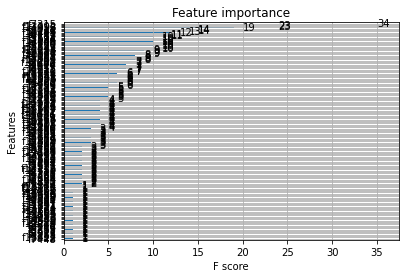

In [ ]:
#输出各种特征重要程度
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

plot_importance(model)
plt.show()

Accuracy of tree model: 0.6806060606060607


Classification report of tree model: 
              precision    recall  f1-score   support

           0       0.72      0.57      0.64      1622
           1       0.65      0.79      0.72      1678

    accuracy                           0.68      3300
   macro avg       0.69      0.68      0.68      3300
weighted avg       0.69      0.68      0.68      3300





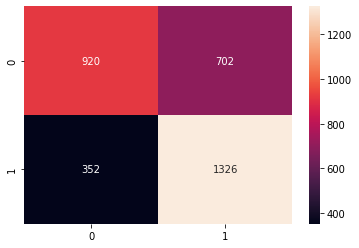

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

def eval(y_pred):
    print("Accuracy of tree model: {}".format(accuracy_score(y_test, y_pred))+"\n\n")
    print("Classification report of tree model: \n{}".format(classification_report(y_test, y_pred))+"\n\n")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="")


eval(y_pred)

In [ ]:
from google.colab import drive
from xgboost import XGBClassifier
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
import string as st
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
import re
from tqdm.notebook import tqdm_notebook
from sklearn.feature_extraction.text import TfidfVectorizer
tqdm_notebook.pandas()
drive.mount('/content/drive')
# 测试用例
file = open("/content/drive/MyDrive/test_group.txt",encoding="utf-16")

def xgboost_evaluate(file):
    model = XGBClassifier(max_depth=4, learning_rate=0.15, n_estimators=100, silent=True,objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0,min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1,colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,base_score=0.5,random_state=0, seed=None, missing=None)

    input = file.readlines()
    stemmer = LancasterStemmer()
    test_corpus = []
    for i in tqdm_notebook(range(len(input))):
        word = re.sub('((www[^\s]+)|(http[^\s]+))',' ',input[i].lower())
        word = word_tokenize(word)
        word = [stemmer.stem(y) for y in word if y not in (list(stopwords.words('english'))+list(st.punctuation))]
        j = " ".join(word)
        test_corpus.append(j)
    mid = pd.DataFrame(test_corpus)
    mid.columns = ['text']
    tf_idf = TfidfVectorizer()
    mid_ = tf_idf.fit_transform(mid['text'])
    # print(mid_)
    model = buildmodel()
    y_mid = model.predict(mid_,validate_features=False)
    f=open("/content/drive/MyDrive/ans.txt","w")
    for i,line in enumerate(input):
        f.write(line+"\x20"+"\x20")
        status = 'positive' if y_mid[i] == 1 else 'negative'
        f.write(status+"\n")
    f.close()

xgboost_evaluate(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/8 [00:00<?, ?it/s]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




  0%|          | 0/10000 [00:00<?, ?it/s]

accuracy:68.06


In [ ]:
# import 的包与上面的共用
a = 'hi! lovely day!'
def xgboost_evaluate_single(sentence):
    word = re.sub('((www[^\s]+)|(http[^\s]+))',' ',sentence.lower())
    stemmer = LancasterStemmer()
    test_corpus = []
    word = word_tokenize(word)
    word = [stemmer.stem(y) for y in word if y not in (list(stopwords.words('english'))+list(st.punctuation))]
    j = " ".join(word)
    test_corpus.append(j)
    mid = pd.DataFrame(test_corpus)
    mid.columns = ['text']
    tf_idf = TfidfVectorizer()
    mid_ = tf_idf.fit_transform(mid['text'])
    # print(mid_)
    model = buildmodel()
    y_mid = model.predict(mid_,validate_features=False)
    status = 'positive' if y_mid == 1 else 'negative'
    return status

b = xgboost_evaluate_single(a)
print(b)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  from ipykernel import kernelapp as app


  0%|          | 0/10000 [00:00<?, ?it/s]

accuracy:68.06
positive
